# CONTENT LIST

1. Importing libraries and data
2. Data cleaning
3. Splitting DF to Run Regression Analysis
4. Data prep for regression analysis
5. Regression analysis

# 01. Importing Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\chery\Desktop\CareerFoundry\Immersion Data Analytics\Achievement 6'

In [4]:
# Import Merged Clean DF

df = pd.read_pickle(os.path.join(path, '04-2021 PPP Loan Analysis','02 Data', 'Prepared Data','Task 6.3 Merged.pkl'))

# 02. Data Cleaning

In [5]:
df.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,loan_amount,city,zip,industry_code,business_type,business_owner_race,business_owner_gender,business_owner_vet_status,jobs_reported,date_loan_approved,lender,congressional_district,_merge
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149992.0,Bellingham,98225.0,nan,Subchapter S Corporation,NaN,NaN,NaN,11.0,05/01/2020,"JPMorgan Chase Bank, National Association",WA-02,both
1,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149980.0,Spokane Valley,99216.0,621210.0,Limited Liability Company(LLC),NaN,NaN,NaN,12.0,04/29/2020,Banner Bank,WA-05,both
2,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149975.0,Kirkland,98033.0,339999.0,Subchapter S Corporation,NaN,NaN,NaN,6.0,04/16/2020,Seattle Bank,WA-01,both
3,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149950.0,Port Orchard,98367.0,238210.0,Limited Liability Company(LLC),NaN,NaN,NaN,10.0,06/13/2020,"Kabbage, Inc.",WA-06,both
4,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",149922.0,Burlington,98233.0,999990.0,Subchapter S Corporation,NaN,NaN,NaN,12.0,05/03/2020,Cross River Bank,WA-02,both


In [6]:
df.shape

(4200172, 17)

In [7]:
df.columns

Index(['STATE_NAME', 'STATE_FIPS', 'STATE_ABBR', 'geometry', 'loan_amount',
       'city', 'zip', 'industry_code', 'business_type', 'business_owner_race',
       'business_owner_gender', 'business_owner_vet_status', 'jobs_reported',
       'date_loan_approved', 'lender', 'congressional_district', '_merge'],
      dtype='object')

In [8]:
df.describe()

,loan_amount,jobs_reported
count,4.200172e+06,4.200172e+06
mean,3.246683e+04,4.604324e+00
std,3.293467e+04,9.897761e+00
min,1.000000e-02,0.000000e+00
25%,9.356920e+03,1.000000e+00
50%,2.070200e+04,2.000000e+00
75%,4.386300e+04,6.000000e+00
max,1.499991e+05,5.000000e+02


#### Missing Values Check

In [5]:
# Check for missing values

df.isnull().sum()

# While missing values, not handling due to nature of values

STATE_NAME                         0
STATE_FIPS                         0
STATE_ABBR                         0
geometry                           0
loan_amount                        0
city                               0
zip                                0
industry_code                      0
business_type                      0
business_owner_race          3773255
business_owner_gender        3322909
business_owner_vet_status    3612897
jobs_reported                      0
date_loan_approved                 0
lender                             0
congressional_district             0
_merge                             0
dtype: int64

#### Duplicates Check

In [ ]:
#Check for duplicate values

dups = df.duplicated()

In [ ]:
dups.shape 

# Above code could not be run due to hardware issues

#### Extreme Values Check

C:\Users\chery\anaconda3\envs\CF\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amount', ylabel='Density'>

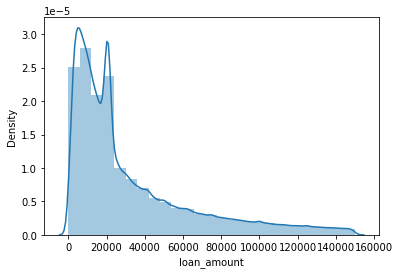

In [6]:
sns.distplot(df['loan_amount'], bins = 25) # Shows extreme values 

C:\Users\chery\anaconda3\envs\CF\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='jobs_reported', ylabel='Density'>

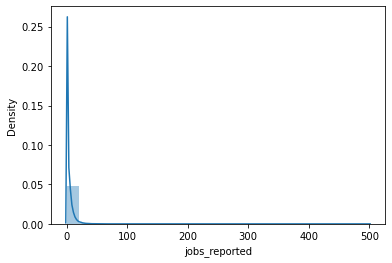

In [8]:
sns.distplot(df['jobs_reported'], bins = 25) # Shows extreme values 

#### No extreme values in either plot

# 03. Splitting DF to Run Regression Analysis

In [5]:
#Create List holding True/False values to test np.random.rand() <=0.7

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [6]:
#Results of New List
dev

array([False,  True, False, ...,  True, False,  True])

In [7]:
#Store 70% of sample in df big, Store 30% of sample in df small

big = df[dev]
small = df[~dev]

In [8]:
#Checking Size of Original df
len(df)

4200172

In [9]:
#Checking Size of Big & Small df combined
len(big)+len(small)

4200172

In [11]:
#Reduce samples to only columns necessary for the chart

df_small = small[['loan_amount','jobs_reported']]

# 04. Data Prep for Regression Analysis

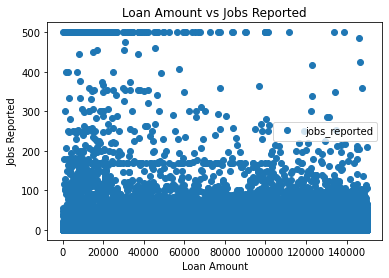

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_2.plot(x = 'loan_amount', y='jobs_reported',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Loan Amount vs Jobs Reported')  
plt.xlabel('Loan Amount')  
plt.ylabel('Jobs Reported')  
plt.show()

## Hypothesis: As the loan amount increases, the number of jobs reported will also increase.

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_2['loan_amount'].values.reshape(-1,1)
y = df_2['jobs_reported'].values.reshape(-1,1)

In [18]:
X

array([[1.49992e+05],
       [1.49975e+05],
       [1.49950e+05],
       ...,
       [5.00000e+02],
       [4.17070e+02],
       [1.41000e+02]])

In [19]:
y

array([[11.],
       [ 6.],
       [10.],
       ...,
       [13.],
       [ 1.],
       [ 1.]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

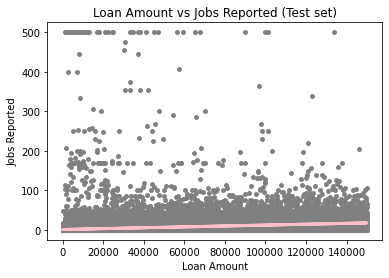

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='pink', linewidth =3)
plot_test.title('Loan Amount vs Jobs Reported (Test set)')
plot_test.xlabel('Loan Amount')
plot_test.ylabel('Jobs Reported')
plot_test.show()

### Interpretation: 

While there is a small, positive linear relationship between loan amount & jobs reported, a lot of outliers are present and this scatterplot is based on only a small portion (30%) of the data. These facts lead me to say that the line does not fit the data that well. 

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00011193]]
Mean squared error:  78.24919256637263
R2 score:  0.14649486284792512


In [27]:
y_predicted

array([[5.56221629],
       [2.38975409],
       [1.53380515],
       ...,
       [2.78297347],
       [4.44198878],
       [6.07827056]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [29]:
data.head(30)

,Actual,Predicted
0,7.0,5.562216
1,1.0,2.389754
2,1.0,1.533805
3,1.0,1.188269
4,1.0,2.941806
5,4.0,2.007280
6,5.0,4.085869
7,1.0,1.521577
8,0.0,2.792376
9,2.0,6.839413


### Compare how the regression fits the training set

In [30]:
# Predict 

y_predicted_train = regression.predict(X_train) # This is predicting X-train

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00011193]]
Mean squared error:  81.91712656975623
R2 score:  0.14189084947157682


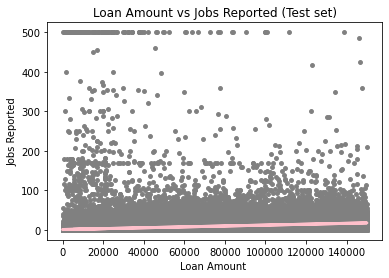

In [34]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='pink', linewidth =3)
plot_test.title('Loan Amount vs Jobs Reported (Test set)')
plot_test.xlabel('Loan Amount ')
plot_test.ylabel('Jobs Reported')
plot_test.show()

### How Well the Model Performed: 

This model is not effective. Both the high mean squared error (81.9, showing that the regression line passes pretty far from the observations) & the low R2 score (0.14, indicating a poor explaination of the variance) confirms the ineffectiveness. While there may be a slight relationship between loan amounts & jobs reported, there are clearly other factors at play.